# Bayesian Statistics made simple - Allen Downey Tutorial PyCon 2016 

Vinitha Palani <br>
August 1, 2017.

This includes notes and my solutions for the exercises from this tutorial https://www.youtube.com/watch?v=TpgiFIGXcT4 

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
from scipy.special import gamma

From wikipedia 

A probability mass function (pmf) is a function that gives the probability that a discrete random variable is exactly equal to some value.( Discrete random variable --> A person's no. of offsprings --> PMF ; Continuous random variable --> A person's height --> PDF) <br>

Warm-up -

In [2]:
# A Pmf is a map from possible outcomes to their probabilities(normalized)
# Roll of a six-sided fair dice
pmf = {}
for x in [1,2,3,4,5,6]:
    pmf[x] = 1/6

In [3]:
pmf

{1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666}

In [8]:
sum(pmf.values()) 

0.9999999999999999

In [21]:
# mean of the possible outcomes 
sum(pmf.keys())/len(list(pmf.values()))

3.5

In [4]:
import matplotlib.pyplot as plt

<Container object of 6 artists>

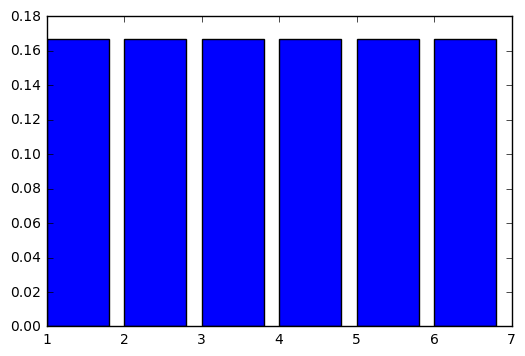

In [30]:
plt.bar(list(pmf.keys()), list(pmf.values()))

<b>Exercise 1: </b>
Compute and plot the Pmf of the sum of two 6-sided dice.

In [38]:
pmf_second = {}
for x in [1,2,3,4,5,6]:
    pmf_second[x] = 1/6

from collections import defaultdict

pmf_combine = defaultdict(float)
for v1, p1 in pmf.items():
    for v2, p2 in pmf_second.items():
        pmf_combine[v1 + v2] += p1 * p2       

In [39]:
pmf_combine

defaultdict(float,
            {2: 0.027777777777777776,
             3: 0.05555555555555555,
             4: 0.08333333333333333,
             5: 0.1111111111111111,
             6: 0.1388888888888889,
             7: 0.16666666666666669,
             8: 0.1388888888888889,
             9: 0.1111111111111111,
             10: 0.08333333333333333,
             11: 0.05555555555555555,
             12: 0.027777777777777776})

<Container object of 11 artists>

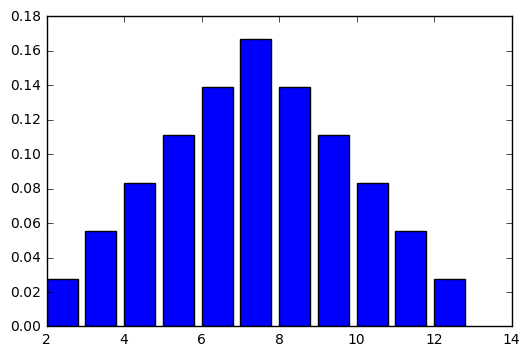

In [40]:
plt.bar(list(pmf_combine.keys()), list(pmf_combine.values()))

<b>Exercise 2:</b> Suppose I roll two dice and tell you the result is greater than 3.
Plot the Pmf of the remaining possible outcomes and compute its mean.

In [52]:
pmf_total_gt3 = dict([(key,value) for key,value in pmf_combine.items() if key > 3]) 

In [53]:
pmf_total_gt3

{4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666669,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

<Container object of 9 artists>

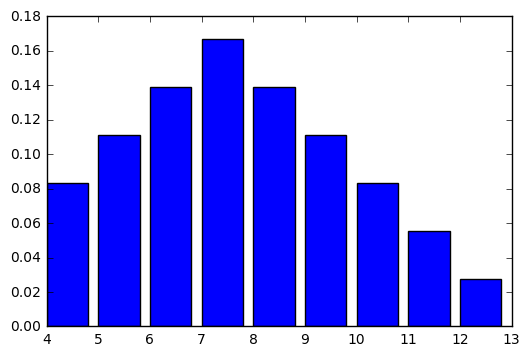

In [54]:
plt.bar(list(pmf_total_gt3.keys()), list(pmf_total_gt3.values()))

This is not quite correct..i have taken some probabilities away from this pmf and now the probabilities do not add up to 1 ..after removing two probabilities we have to normalize again.

In [74]:
sum(pmf_combine.values())

1.0000000000000002

In [75]:
sum(pmf_total_gt3.values())

0.9166666666666667

## The Cookie Problem

#### Bayes Theorem - 

The theorem follows directly from writing the definition of conditional probability in two ways:

$$
p(H|D) = \frac{p(D|H)p(H)}{p(D)}
$$

<b>Diachronic Interpretation :</b>

Idea that when you get new data you change('update') your belief about the hypothesis.

H : Hypothesis <br>
D : Data <br>

Given p(H) , the probability of the hypothesis <font color='red'> before </font> you saw the data.--prior <br> 
Given p(H|D) , the probability of the hypothesis <font color='red'>after</font> you saw the data.-- posterior<br>
$$
Posterior = \frac{Likelihood\ *\ Prior}{Evidence}
$$

##### Cookie problem :
Suppose there are 2 bowls of cookies -

Bowl #1 has 10 chocholate and 30 vanilla.

Bowl #2 has 20 of each.

Fred picks a bowl at random and then picks a cookie at random. The cookie turns out to be vanilla.

What is the probability that Fred picked from bowl #1 ?

Answer : (one way to do this )

H : Hypothesis that the cookie came from bowl1
D : The cookie is vanilla

p(H|D) = Posterior = ?

p(D|H) = Conditional likelihood of data = <font color='red'>30/40 or 3/4</font>

p(H) = Prior = <font color='red'>1/2</font>

p(D) = Total probability of data(under any circumstance) = <font color='red'>50/80 or 5/8</font>
This is a simple case so mentally combine the two bowls and conclude that 5/8 of the total no. is vanilla.

p(H|D) = (p(D|H) * p(H))/p(D)

       = (3/4 * 1/2) / (5/8) =  3/5
       
Little intuition :

We started with a prior of 50% (1/2) chance of selecting bowl 1 we endesd up with a posterior of 60% so we are alittle bit more confident that it is bowl no.1 after seeing a vanilla cookie.

<b>D was more likely under H.</b>Evidence in favor of the bowl 1 hypothesis

<b>D increases our degree of belief in H.</b>

Difference between probability and likelihood : probabilities are normalized they are all going to add up to 1 , Likelihood are not necessarily normalized they may not add up to 1 but they will be proportional to 1.

PMF => a computational framework for doing the same thing.


In [14]:
#set priors
cookie_pmf = {}
for x in ['bowl1','bowl2']:
    cookie_pmf[x] = 1/2

In [15]:
#Update each hypothesis with the likelihood of the data (a vanilla cookie).
cookie_pmf['bowl1'] *= 3/4
cookie_pmf['bowl2'] *= 1/2

In [16]:
cookie_pmf

{'bowl1': 0.375, 'bowl2': 0.25}

In [17]:
#normalize (divide by total probability of getting vanilla cookie,bowl1 or bowl 2)
cookie_pmf['bowl1'] /= 5/8
cookie_pmf['bowl2'] /= 5/8

In [18]:
cookie_pmf

{'bowl1': 0.6, 'bowl2': 0.4}

<b>Exercise 3: </b>Suppose we put the first cookie back, stir, choose again from the same bowl, and get a chocolate cookie.

In [19]:
# The posterior (after the first cookie) becomes the prior (before the second cookie).
# Prior
cookie_pmf

{'bowl1': 0.6, 'bowl2': 0.4}

In [20]:
#Update each hypothesis with the likelihood of the data (a chocolate cookie).
cookie_pmf['bowl1'] *= 1/4
cookie_pmf['bowl2'] *= 1/2

In [21]:
cookie_pmf

{'bowl1': 0.15, 'bowl2': 0.2}

In [22]:
#normalize (divide by total probability of getting chocholate cookie,bowl1 or bowl 2)
cookie_pmf['bowl1'] /= (0.15 + 0.2)
cookie_pmf['bowl2'] /= (0.15 + 0.2)

In [23]:
cookie_pmf

{'bowl1': 0.4285714285714286, 'bowl2': 0.5714285714285715}

Every time you sees a new piece of data it chnages your opinion about what is going on by a lil bit. we started at 50/50 the we saw a vanilla cookie , vanilla cookie is more likely from bowl 1 that moved as in the direction of bowl one from 50 to 60. Now we see a chocholate cookie, you thought you know i thought it was bowl1 now i am beginning to doubt myself ; a chocholate cookie is a strong piece of evidence , a chocolate cookie is twice as likely to come from bowl 1 than from bowl 2 , it has tipped me all the way back from 50, past 50 to 42.This tipping back and forth will continue for a while until we get enough data to let us decide bowl 1 or bowl 2.

<b>Exercise 4:</b>Instead of doing two updates, what if we collapse the two pieces of data into one update?
Re-initialize Pmf with two equally likely hypotheses and perform one update based on two pieces of data, a vanilla cookie and a chocolate cookie.
The result should be the same regardless of how many updates you do (or the order of updates).

In [42]:
#set priors
cookie_pmf = {}
for x in ['bowl1','bowl2']:
    cookie_pmf[x] = 1/2

In [43]:
#Update each hypothesis with the likelihood of the data (a chocolate cookie).
cookie_pmf['bowl1'] *= 3/4 * 1/4
cookie_pmf['bowl2'] *= 1/2 * 1/2

In [44]:
cookie_pmf

{'bowl1': 0.09375, 'bowl2': 0.125}

In [45]:
tot_proba = cookie_pmf['bowl1'] + cookie_pmf['bowl2']

In [46]:
#normalize (divide by total probability of getting chocholate cookie,bowl1 or bowl 2)
cookie_pmf['bowl1'] /= tot_proba
cookie_pmf['bowl2'] /= tot_proba

In [47]:
cookie_pmf

{'bowl1': 0.42857142857142855, 'bowl2': 0.5714285714285714}

It doesnt matter what order you consider the data.If we are considering without replacemnet then we need to have a datstructure to figure out how many cookies are left in the bowls.If we do not replace the likelihoods change each time.

## The dice problem

I have abox of dice that contains a 4-sided die , 6-sided die, an 8-sided die and a 12-sided die. Suppose I select a die from the box at random, roll it and get a 6. What is the probability that i rolled each die? 

Computaional frame work  :
<b>A suite is a mutually exclusive and collectively exhaustive set of hypothesis.</b>
Collecively exhaustive means one of them must be true..if all of the hypothesis are impossible then there is something wrong very with the assumptions.one could get away with this by including a catch-all, 'my-model-is-broken' hypothesis which will have a very low initial probability.<br>
Represented by a Suite that maps hypothesis -> probability
Dice is a--> Suite is a--> PMF is a--> dictionary
Create a Suite to represent dice with different numbers of sides.

<b>Exercise 5 </b>We'll solve this problem two ways. First we'll do it "by hand", as we did with the cookie problem; that is, we'll multiply each hypothesis by the likelihood of the data, and the renormalize.

In [48]:
#set priors
dice_pmf = {}
for x in ['4','6','8','12']:
    dice_pmf[x] = 1/4

In [49]:
#Update each hypothesis with the likelihood of the data (getting a '6').
dice_pmf['4'] *= 0
dice_pmf['6'] *= 1/6
dice_pmf['8'] *= 1/8
dice_pmf['12'] *= 1/12

In [50]:
tot_proba = dice_pmf['4'] + dice_pmf['6'] + dice_pmf['8'] + dice_pmf['12']

In [51]:
#normalize (divide by total probability of getting a 6)
dice_pmf['4'] /= tot_proba
dice_pmf['6'] /= tot_proba
dice_pmf['8'] /= tot_proba
dice_pmf['12'] /= tot_proba

In [52]:
dice_pmf

{'12': 0.22222222222222224,
 '4': 0.0,
 '6': 0.4444444444444445,
 '8': 0.33333333333333337}

<b>Exercise 6 :</b>Write a definition for a new class called Dice. Then define a method called Likelihood that takes data and hypo and returns the probability of the data (the outcome of rolling the die) for a given hypothesis (number of sides on the die).
Hint: What should you do if the outcome exceeds the hypothetical number of sides on the die?

In [79]:
class Dice():
        # hypo is the number of sides on the die
        # data is the outcome
        
        def __init__(self, hypo):
            self.hypo_dic = {}
            for x in hypo:
               self.hypo_dic[x] = 1/4
            return
        
        def Likelihood(self, data, hypo):
            if data > hypo:
                return 0
            else:
                return 1 / hypo
            
        def Update(self, data):
            
            for hypo,_ in self.hypo_dic.items():
                like = self.Likelihood(data, hypo)
                self.hypo_dic[hypo] *= like 
                
            total_prob = sum(self.hypo_dic.values()) 
            
            for hypo,_ in self.hypo_dic.items():
                 self.hypo_dic[hypo] /= total_prob         
            return self
        
        def Print(self):
            for hypo,value in self.hypo_dic.items():
                print("Hypothesis : "+str(hypo)+"  value : ",value)

In [75]:
dice = Dice([4,6,8,12])

In [76]:
dice.Print()

Hypothesis : 8  value :  0.25
Hypothesis : 12  value :  0.25
Hypothesis : 4  value :  0.25
Hypothesis : 6  value :  0.25


In [77]:
#data --> got a '6'
dice.Update(6)

In [78]:
dice.Print()

Hypothesis : 8  value :  0.3333333333333333
Hypothesis : 12  value :  0.2222222222222222
Hypothesis : 4  value :  0.0
Hypothesis : 6  value :  0.4444444444444444


In [80]:
# more data 
for roll in [8, 7, 7, 5, 4]:
    dice.Update(roll)

In [81]:
dice.Print()

Hypothesis : 8  value :  0.9192938209331653
Hypothesis : 12  value :  0.0807061790668348
Hypothesis : 4  value :  0.0
Hypothesis : 6  value :  0.0


The 4-sided and 6-sided are ruled out as we got numbers greater than 6. The hypothesis that the dice is '8' sided has 91% , this is because we havent seen anything greater than 8, if it were the 12-sided dice then this would have been unlikely.That is what those posterior probabilities are telling us.

## German Tank problem
World warII Germans manufactured tanks with the serial number on the chassis and wheel which were allocated in blocks of 100. But not all numbers upto 100 were used all the time, they wud start with a 1 and go upto however many tanks they produced. When a tank number with 37 is captured. How many numbers in the block were used(How many they made)? 

This is actually pretty much like the Dice problem ..

In [128]:
class Tank():
        # hypo is the number of tanks        
        def __init__(self, hypo):
            self.hypo_dic = {}
            for x in hypo:
               self.hypo_dic[x] = 1/100
            return
        
        def Likelihood(self, data, hypo):
            if data > hypo:
                return 0
            else:
                return 1 / hypo
            
        def Update(self, data):
            
            for hypo,_ in self.hypo_dic.items():
                like = self.Likelihood(data, hypo)
                self.hypo_dic[hypo] *= like 
                
            total_prob = sum(self.hypo_dic.values()) 
            
            for hypo,_ in self.hypo_dic.items():
                 self.hypo_dic[hypo] /= total_prob         
            return self
        
        def Print(self):
            for hypo,value in self.hypo_dic.items():
                print("Hypothesis : "+str(hypo)+"  value : ",value)
        
        def pdf(self):
            plt.plot(list(self.hypo_dic.keys()), list(self.hypo_dic.values()))
        
        def Mean(self):
            return sum(p * x for x, p in self.hypo_dic.items())

In [107]:
tank = Tank(range(100))

In [108]:
tank.Update(37)

In [109]:
tank.Mean()

62.82294478516895

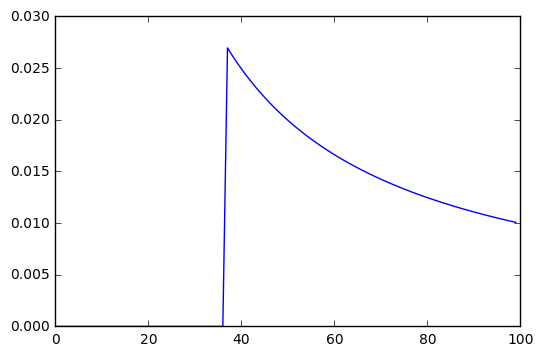

In [129]:
tank.pdf()

<b>Exercise 7: </b> Suppose we see another tank with serial number 17. What effect does this have on the posterior probabilities?Update the suite again with the new data and plot the results.

57.81472076260487

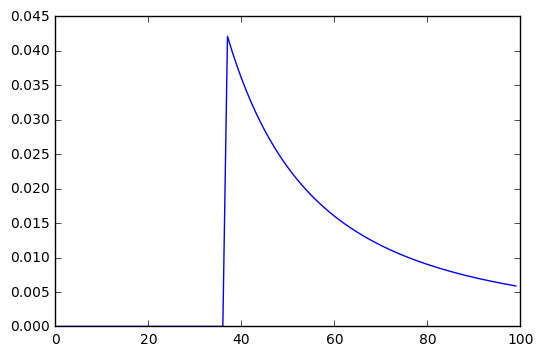

In [130]:
tank.Update(17)
tank.pdf()
tank.Mean()

The fact that i saw 17 does not influence much the things that are on the left of 37 but it does influence the right side a, all the high numbers they all have gone down a little bit and my belief in 37 has gotten a little bit stronger.Same thing happened with the 12-sided dice in the previous problem because if it were the 12-sided dice it would be unlikely to see low numbers over and over again .Same thing here if the germens had made 99 tanks, it wud be a little surprising to get 17 and 37 and nothing higher than 50.

Let's say they captured tank no.85

91.39135260236333

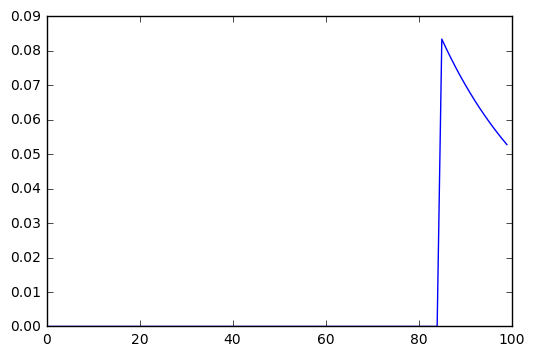

In [131]:
tank.Update(85)
tank.pdf()
tank.Mean()

The confidence we have in these numbers depends roughly on the width of the distribution.It it were a wide distribution with almost equal probability for number from 1 to 100 in bayesian it mean "I dont know". But if it is narrow it means we are confident that it falls in this range.There is a metric for that it is called "entropy".

## The Euro problem -- Estimating proportions
This comes from when Euro coin was first introduced.
"When spun on edge 250 times , A Belgian one-euro coin came up heads 140 times and tails 110.'This looks very suspicious to me'said Barry Blight, a stats lecturer at the LSB. 'If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%".

Assume that the coin has probability x of landing heads.
Based on the data (140 heads, 110 tails) what is x?

We are talking probability or probabilities. Forget that x is probability; just think of it as a physical characteristic.

<b>Exercise 8:</b> Write a class definition for Euro, which extends Suite and defines a likelihood function that computes the probability of the data (heads or tails) for a given value of x (the probability of heads).

In [159]:
class Euro():
        # hypo is the prob of heads(0-100)       
        def __init__(self, hypo):
            self.hypo_dic = {}
            for x in hypo:
               self.hypo_dic[x] = 1/100
            return
        
        def Likelihood(self, data, hypo):
            """ 
            hypo is the prob of heads (0-100)
            data is a string, either 'H' or 'T'
            """
            x = hypo / 100
            if data == 'H':
                return x
            else:
                return 1-x
            
        def Update(self, data):
            
            for hypo,_ in self.hypo_dic.items():
                like = self.Likelihood(data, hypo)
                self.hypo_dic[hypo] *= like 
                
            total_prob = sum(self.hypo_dic.values()) 
            
            for hypo,_ in self.hypo_dic.items():
                 self.hypo_dic[hypo] /= total_prob         
            return self
        
        def Print(self):
            for hypo,value in self.hypo_dic.items():
                print("Hypothesis : "+str(hypo)+"  value : ",value)
        
        def pdf(self):
            plt.plot(list(self.hypo_dic.keys()), list(self.hypo_dic.values()))
        
        def Mean(self):
            return sum(p * x for x, p in self.hypo_dic.items())
        
        def MaximumLikelihood(self):
            _, val = max((p, x) for x, p in self.hypo_dic.items())
            return val
        
        def CredibleInterval(self):
             percentage = 90 # 90% CI
             prob = (1 - percentage / 100) / 2
             l1 = 0
             l2 = 0
             for x, p in self.hypo_dic.items():
                 if p == prob :
                    l1 = x
                 if p == (1-prob) :
                    l2 = x
             return l1,l2

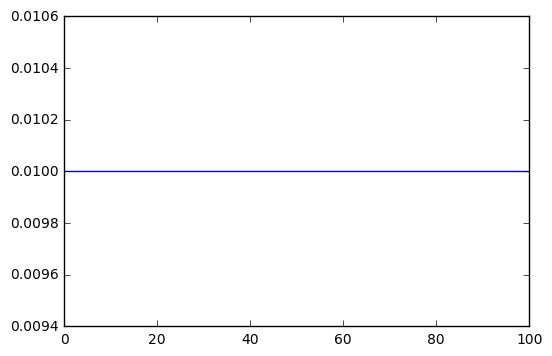

In [134]:
euro = Euro(range(101))
euro.pdf()

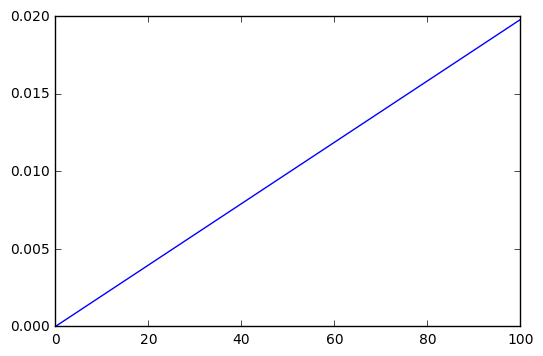

In [135]:
# we get a single Head
euro.Update('H')
euro.pdf()

The probability that x=0 has zero probbaility now that we have seen a Head. We has eliminated that possibility.

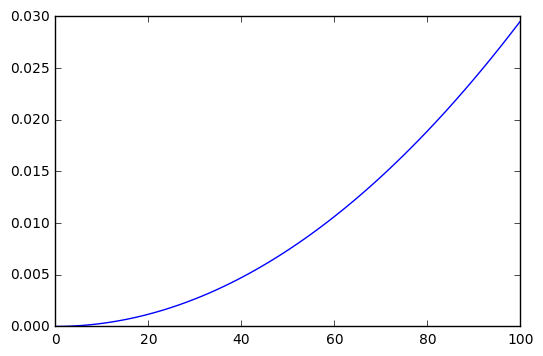

In [136]:
# we get another Head
euro.Update('H')
euro.pdf()

This is a parabola ..higher numbers 80-90 are more likely.

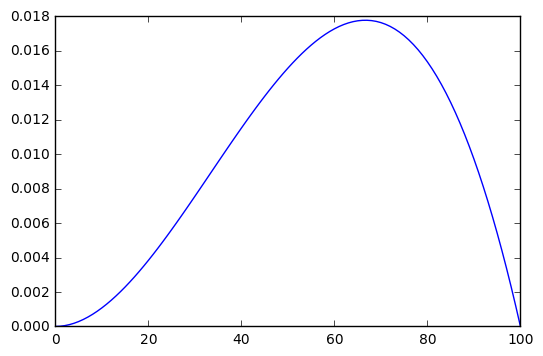

In [137]:
# we get a Tail
euro.Update('T')
euro.pdf()

Now that i have seen a tail it is not possible for the probability of heads to be a 100 percent ..so we see that the probability of 100 has been reduced to zero.Most likely value is 66% (2/3 which is the observed proportion of heads).Width of this curve tells us how confident we are.The distribution is wide, that means we are not that confident.The width of the curve is proportion to the square-root of n and not n.

70

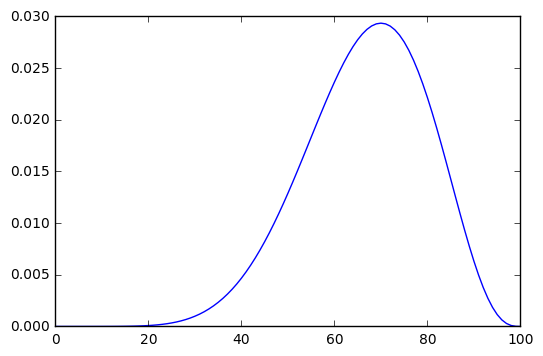

In [142]:
euro = Euro(range(101))

for outcome in 'HHHHHHHTTT':
    euro.Update(outcome)

euro.pdf()
euro.MaximumLikelihood()

The maximum posterior probability is 70%, which is the observed proportion. ==>Maximum likelihood (Mode)

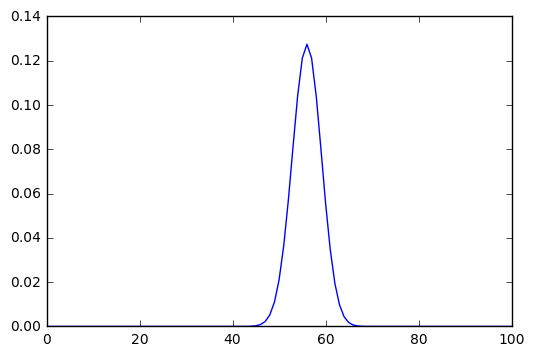

In [160]:
#Here are the posterior probabilities after 140 heads and 110 tails.
euro = Euro(range(101))

for outcome in 'H' * 140 + 'T' * 110:
    euro.Update(outcome)
euro.pdf()

In [145]:
euro.Mean()

55.95238095238094

In [146]:
euro.MaximumLikelihood()

56

The posterior <font color='red'> credible interval </font>has 90% chance of containing the true value (provided that the prior distribution truly represents our background knowledge).In classical statistics it is a <b> forbidden </b>thing to say that the <font color='red'> confidence interval </font> has 90% probability of containing the true value.
   
    For example, when constructing a standard 95% bound about a parameter θ: • A Bayesian would say: “Given our observed data, there is a 95% probability that the true value of θ lies within the credible region”. • A frequentist would say: “If this experiment is repeated many times, in 95% of these cases the computed conﬁdence interval will contain the true θ.”

Barry Blight, a stats lecturer at the LSB. 'If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%". This was based on p-value 7% was borderline statistically significant.
There are two bayesian responses to that -
1) If you really want to hypothesis testing, you can do bayesian hypothesis testing and find out if the coin is fair.
2) But try to make binary decisions about the world..just say look this what i found out about the coin.. having seen the data this distribution represents my knowledge of the coin. If you want to know the probability of heads for the next coin toss, I can answer that.

One of the nice things of about Bayes is that the posterior distribution gives the natural interpretation of probability that you want.However there is a price to pay - the prior.

We chose it arbitrarily, and reasonable people might disagree.

Is X as likely to be 1% as 50%?

Given what we know about coins, we doubt it.

So uniform prior was not a really good choice.

How should we capture background knowledge about coins ? It is called an informative prior.
Try a triangular prior.50-50 is pretty likely and values close 50 are also somewhat likely and 0 and 100 are impossible.
But when i pick my prior i should not implicitly use my data, I am allowed to use the things i know in life(physical model of coins).I can run the analysis with different priors, but will end up with pretty much the same posterior(not exactly the same though) if all of them started with something reasonable(u cant start with zero lest you end up with zero) .

Swamp the prior<br>
With enough data, reasonable people will converge if there is enough data. If any p(H) = 0, no data will change that.Priors can be arbitrarily low but avoid 0. See Cromwell's rule :

       " I beseech you, in the bowels of Christ, think it possible that you may be mistaken"
In small data scenario, we have to try out different priors. 

In [173]:
#pdf formula for triangular distributions from https://en.wikipedia.org/wiki/Triangular_distribution 

class Euro_tri():
        # hypo is the prob of heads(0-100)       
        def __init__(self, hypo):
            self.hypo_dic = {}
            for x in range(0, 101):
                if x in [0,100]:
                    self.hypo_dic[x] = 0
                elif x == 50:
                    self.hypo_dic[x] = 1/x
                elif x in range(1,51):
                    self.hypo_dic[x] = x/2500    
                else:
                    self.hypo_dic[x] = (100 - x)/2500
            return
        
        def Likelihood(self, data, hypo):
            """ 
            hypo is the prob of heads (0-100)
            data is a string, either 'H' or 'T'
            """
            x = hypo / 100
            if data == 'H':
                return x
            else:
                return 1-x
            
        def Update(self, data):
            
            for hypo,_ in self.hypo_dic.items():
                like = self.Likelihood(data, hypo)
                self.hypo_dic[hypo] *= like 
                
            total_prob = sum(self.hypo_dic.values()) 
            
            for hypo,_ in self.hypo_dic.items():
                 self.hypo_dic[hypo] /= total_prob         
            return self
        
        def Print(self):
            for hypo,value in self.hypo_dic.items():
                print("Hypothesis : "+str(hypo)+"  value : ",value)
        
        def pdf(self):
            plt.plot(list(self.hypo_dic.keys()), list(self.hypo_dic.values()))
        
        def Mean(self):
            return sum(p * x for x, p in self.hypo_dic.items())
        
        def MaximumLikelihood(self):
            _, val = max((p, x) for x, p in self.hypo_dic.items())
            return val

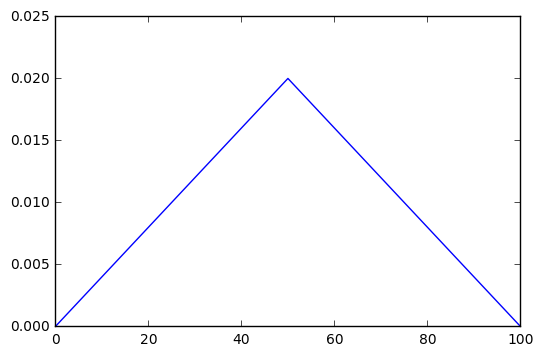

In [174]:
euro = Euro_tri(range(101))
euro.pdf()

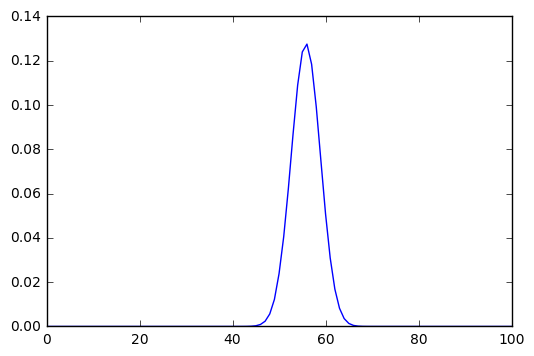

In [178]:
#Here are the posterior probabilities after 140 heads and 110 tails.
euro = Euro_tri(range(101))

for outcome in 'H' * 140 + 'T' * 110:
    euro.Update(outcome)
euro.pdf()

In [179]:
euro.MaximumLikelihood()

56

In [180]:
euro.Mean()

55.74349943859508

So we ended up with almost the same distribution though we used a different prior.

## World Cup Problem
In the 2014 FIFA World Cup , Germany played Brazil in the semifinal match.Germany scored after 11 minutes and agin at the 23 minute mark.At that point in the match, how many goals would you expect Germany to score after 90 minutes?

What was the probability that they would score 5 more goals(as, in fact, they did)? Or can you make a Bayesian update to predict how many more goals the Germans will score?

Model goal scoring using a Poisson process :

When modelling the real world we have to always make simplifications .. what can i leave and what should be included.Here we will model goal scoring using a Poisson process. If it is a Poisson process, a goal is equally likely at pretty much any time during the game. Each team will have a goal scoring rate and chance of scoring during any given time interval is the same.

Poisson process :

- Events are equally likely to occur at any time.
- Arrival rate is λ events/time-unit.
- Time between events has an exponential distribution.
- Number of events in a given time has Poisson distribution 

Estimation :

- Use the first two goals to estimate  λ in goals/game
- Use the posterior distribution of  λ to make predictions 

Get Bayesian :

What are the parameters?

    The goal scoring rate  λ in goals per game

what are the hypotheses?
   
    A ramge of possible values for λ.( can range from zero goals per game to a hundred or a thousnd, there is no real upper bound)

What is the prior?

    Ask experts/stats from previous games . Gamma distribution with mean based on previous games 

We'll use λ to represent the hypothetical goal-scoring rate in goals per game.

To compute prior probabilities for values of λ, I'll use a Gamma distribution.
The mean is 1.3, which is the average number of goals per team per game in World Cup play.


<b>Exercise 9:</b> Write a class called Soccer that extends Suite and defines Likelihood, which should compute the probability of the data (the time between goals in minutes) for a hypothetical goal-scoring rate, lam, in goals per game.
Hint: For a given value of lam, the time between goals is distributed exponentially.

In [34]:
class Soccer():
        """Represents hypotheses about goal-scoring rates."""
        def __init__(self, xs, a):
            self.hypo_dic = {}
            xs = np.asarray(xs)
            ps = xs**(a-1) * np.exp(-xs) / gamma(a)
            ps = np.asarray(ps)
            total_prob = sum(ps)
            ps /= total_prob
            self.hypo_dic = dict(zip(xs, ps))
            return 
        
        def Likelihood(self, data, hypo):
            """Computes the likelihood of the data under the hypothesis.

            hypo: scoring rate in goals per game
            data: interarrival time in minutes
            each game is 90 minutes
            """
            x = data / 90
            lam = hypo
            like = lam * math.exp(-lam * x)
            return like
            
        def Update(self, data):
            
            for hypo,_ in self.hypo_dic.items():
                like = self.Likelihood(data, hypo)
                self.hypo_dic[hypo] *= like 
                
            total_prob = sum(self.hypo_dic.values()) 
            
            for hypo,_ in self.hypo_dic.items():
                 self.hypo_dic[hypo] /= total_prob         
            return self
        
        def Print(self):
            for hypo,value in self.hypo_dic.items():
                print("Hypothesis : "+str(hypo)+"  value : ",value)
        
        def pdf(self):
            plt.scatter(list(self.hypo_dic.keys()), list(self.hypo_dic.values()))
            plt.ylim(0,0.05)
            plt.xlim(0,8)
            plt.xlabel('Goals per game')
        
        def Mean(self):
            return sum(p * x for x, p in self.hypo_dic.items())
        
        def MaximumLikelihood(self):
            _, val = max((p, x) for x, p in self.hypo_dic.items())
            return val

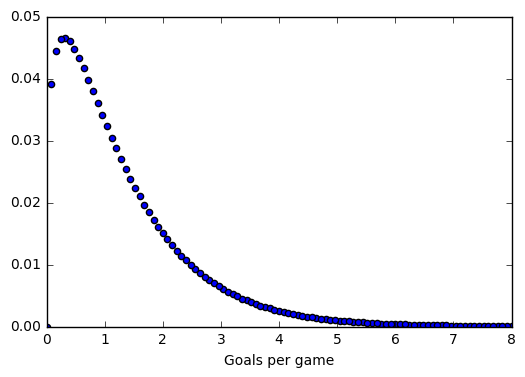

In [35]:
xs = np.linspace(0, 8, 101)
soccer = Soccer(xs, 1.3)
soccer.pdf()

In [36]:
soccer.Mean()

1.3103599490022575

2.035267756093734

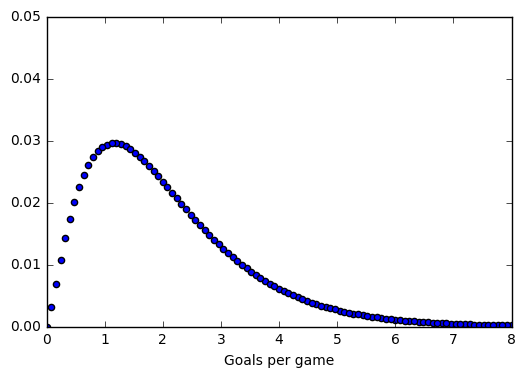

In [37]:
soccer.Update(11)
soccer.pdf()
soccer.Mean()

This means that having seen goal early in the game we are more inclined to believe in high values of λ.

2.6029902257702697

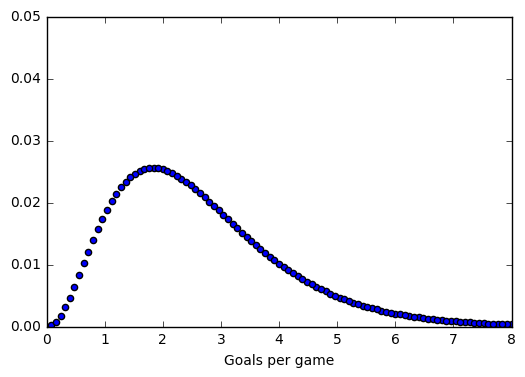

In [38]:
#Here's the update after the second goal at 23 minutes (the time between first and second goals is 12 minutes).
soccer.Update(12)
soccer.pdf()
soccer.Mean()

This distribution represents our belief about lam after two goals.

Distribution has shifted to the right now 2 is the most likely value and 5 is not all that surprising anymore. 

### Estimating the predictive distribution

Now to predict the number of goals in the remaining 67 minutes. 
Given λ, the expected number of goals is Poisson.WE don't know  λ, but we know a range of possible values and their probabilities.

Option 1 : Use the posterior mean value of  λ (2.6) and compute a Poisson distribution that takes into account the remaining time in the game (Simple , but not Correct)

Option 2 : Make a mixure of Poisson distributions for all possible values of  λ. (this reflects my uncertainy about  λ)

There are two sources of uncertainty:
We don't know the true value of λ.
Even if we did we wouldn't know how many goals would be scored.
We can quantify both sources of uncertainty at the same time, like this:
Choose a random values from the posterior distribution of λ.
Use the chosen value to generate a random number of goals.
If we run these steps many times, we can estimate the distribution of goals scored.